# Setting Environment Variables###
*Importing all the packages needed*

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))



pandas : 1.0.5
numpy : 1.18.5
matplotlib : 3.2.2
seaborn : 0.10.1
sklearn : 0.24.2


# Features are labelled### 

In [2]:
features = ['frame.interface_id',
 'frame.dlt', 'frame.offset_shift',
 'frame.time_epoch', 'frame.time_delta',
 'frame.time_delta_displayed', 'frame.time_relative',
 'frame.len', 'frame.cap_len',
 'frame.marked', 'frame.ignored',
 'radiotap.version', 'radiotap.pad',
 'radiotap.length', 'radiotap.present.tsft',
 'radiotap.present.flags', 'radiotap.present.rate',
 'radiotap.present.channel', 'radiotap.present.fhss',
 'radiotap.present.dbm_antsignal', 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality', 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power',
 'radiotap.present.antenna', 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise', 'radiotap.present.rxflags',
 'radiotap.present.xchannel', 'radiotap.present.mcs',
 'radiotap.present.ampdu', 'radiotap.present.vht',
 'radiotap.present.reserved', 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns', 'radiotap.present.ext', 'radiotap.mactime',
 'radiotap.flags.cfp', 'radiotap.flags.preamble',
 'radiotap.flags.wep', 'radiotap.flags.frag',
 'radiotap.flags.fcs', 'radiotap.flags.datapad',
 'radiotap.flags.badfcs', 'radiotap.flags.shortgi',
 'radiotap.datarate', 'radiotap.channel.freq',
 'radiotap.channel.type.turbo', 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm', 'radiotap.channel.type.2ghz',
 'radiotap.channel.type.5ghz', 'radiotap.channel.type.passive',
 'radiotap.channel.type.dynamic', 'radiotap.channel.type.gfsk',
 'radiotap.channel.type.gsm', 'radiotap.channel.type.sturbo',
 'radiotap.channel.type.half', 'radiotap.channel.type.quarter',
 'radiotap.dbm_antsignal', 'radiotap.antenna',
 'radiotap.rxflags.badplcp', 'wlan.fc.type_subtype', 'wlan.fc.version',
 'wlan.fc.type', 'wlan.fc.subtype',
 'wlan.fc.ds', 'wlan.fc.frag',
 'wlan.fc.retry', 'wlan.fc.pwrmgt',
 'wlan.fc.moredata', 'wlan.fc.protected',
 'wlan.fc.order', 'wlan.duration',
 'wlan.ra', 'wlan.da', 'wlan.ta',
 'wlan.sa', 'wlan.bssid', 'wlan.frag', 'wlan.seq',
 'wlan.bar.type', 'wlan.ba.control.ackpolicy',
 'wlan.ba.control.multitid', 'wlan.ba.control.cbitmap',
 'wlan.bar.compressed.tidinfo', 'wlan.ba.bm',
 'wlan.fcs_good', 'wlan_mgt.fixed.capabilities.ess',
 'wlan_mgt.fixed.capabilities.ibss', 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy', 'wlan_mgt.fixed.capabilities.preamble',
 'wlan_mgt.fixed.capabilities.pbcc', 'wlan_mgt.fixed.capabilities.agility',
 'wlan_mgt.fixed.capabilities.spec_man', 'wlan_mgt.fixed.capabilities.short_slot_time',
 'wlan_mgt.fixed.capabilities.apsd', 'wlan_mgt.fixed.capabilities.radio_measurement',
 'wlan_mgt.fixed.capabilities.dsss_ofdm', 'wlan_mgt.fixed.capabilities.del_blk_ack',
 'wlan_mgt.fixed.capabilities.imm_blk_ack', 'wlan_mgt.fixed.listen_ival',
 'wlan_mgt.fixed.current_ap', 'wlan_mgt.fixed.status_code', 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.beacon', 'wlan_mgt.fixed.aid',
 'wlan_mgt.fixed.reason_code', 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.auth_seq', 'wlan_mgt.fixed.category_code',
 'wlan_mgt.fixed.htact', 'wlan_mgt.fixed.chanwidth',
 'wlan_mgt.fixed.fragment', 'wlan_mgt.fixed.sequence',
 'wlan_mgt.tagged.all', 'wlan_mgt.ssid',
 'wlan_mgt.ds.current_channel', 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tim.dtim_period', 'wlan_mgt.tim.bmapctl.multicast',
 'wlan_mgt.tim.bmapctl.offset', 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.version', 'wlan_mgt.rsn.gcs.type', 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.rsn.akms.count', 'wlan_mgt.rsn.akms.type',
 'wlan_mgt.rsn.capabilities.preauth', 'wlan_mgt.rsn.capabilities.no_pairwise',
 'wlan_mgt.rsn.capabilities.ptksa_replay_counter', 'wlan_mgt.rsn.capabilities.gtksa_replay_counter',
 'wlan_mgt.rsn.capabilities.mfpr', 'wlan_mgt.rsn.capabilities.mfpc',
 'wlan_mgt.rsn.capabilities.peerkey', 'wlan_mgt.tcprep.trsmt_pow',
 'wlan_mgt.tcprep.link_mrg', 'wlan.wep.iv',
 'wlan.wep.key', 'wlan.wep.icv',
 'wlan.tkip.extiv', 'wlan.ccmp.extiv',
 'wlan.qos.tid', 'wlan.qos.priority',
 'wlan.qos.eosp', 'wlan.qos.ack',
 'wlan.qos.amsdupresent', 'wlan.qos.buf_state_indicated1',
 'wlan.qos.bit4', 'wlan.qos.txop_dur_req',
 'wlan.qos.buf_state_indicated2', 'data.len',
 'class']

# Loading Training Dataset###

*The training dataset is AWID training data set*

*The size of dataset is 844mb*

In [3]:
awid = pd.read_csv("AWID-CLS-R-Trn",header=None,names=features)

In [4]:
awid.shape

(1795575, 155)

*Header information of the dataset*

In [5]:
awid.head()

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,?,0.0,1.393661e+09,0.000000,0.000000,0.000000,261,261,0,...,?,?,?,?,?,?,?,?,?,normal
1,0,?,0.0,1.393661e+09,0.024271,0.024271,0.024271,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
2,0,?,0.0,1.393661e+09,0.001631,0.001631,0.025902,185,185,0,...,?,?,?,?,?,?,?,?,?,normal
3,0,?,0.0,1.393661e+09,0.055325,0.055325,0.081227,159,159,0,...,?,?,?,?,?,?,?,?,?,normal
4,0,?,0.0,1.393661e+09,0.000415,0.000415,0.081642,54,54,0,...,?,?,?,?,?,?,?,?,?,normal


*Here in the dataset all the ? values are replaced with None*

In [6]:
awid.replace({"?":None}, inplace=True)
null_column=awid.columns[awid.isnull().mean() >= 0.51]
null_column.shape

(70,)

In [7]:
awid.head()

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,None,0.0,1.393661e+09,0.000000,0.000000,0.000000,261,261,0,...,None,None,None,None,None,None,None,None,None,normal
1,0,None,0.0,1.393661e+09,0.024271,0.024271,0.024271,185,185,0,...,None,None,None,None,None,None,None,None,None,normal
2,0,None,0.0,1.393661e+09,0.001631,0.001631,0.025902,185,185,0,...,None,None,None,None,None,None,None,None,None,normal
3,0,None,0.0,1.393661e+09,0.055325,0.055325,0.081227,159,159,0,...,None,None,None,None,None,None,None,None,None,normal
4,0,None,0.0,1.393661e+09,0.000415,0.000415,0.081642,54,54,0,...,None,None,None,None,None,None,None,None,None,normal


In [8]:
awid.shape

(1795575, 155)

*Checking for any null values in the dataset*

In [9]:
awid.isnull()

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated1,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
1,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
3,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
4,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795570,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
1795571,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
1795572,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
1795573,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False


In [10]:
awid.isnull().sum()

frame.interface_id                     0
frame.dlt                        1795575
frame.offset_shift                     0
frame.time_epoch                       0
frame.time_delta                       0
                                  ...   
wlan.qos.bit4                    1648935
wlan.qos.txop_dur_req            1648935
wlan.qos.buf_state_indicated2    1279874
data.len                          903021
class                                  0
Length: 155, dtype: int64

In [11]:
awid['class'].value_counts()

normal           1633190
injection          65379
impersonation      48522
flooding           48484
Name: class, dtype: int64

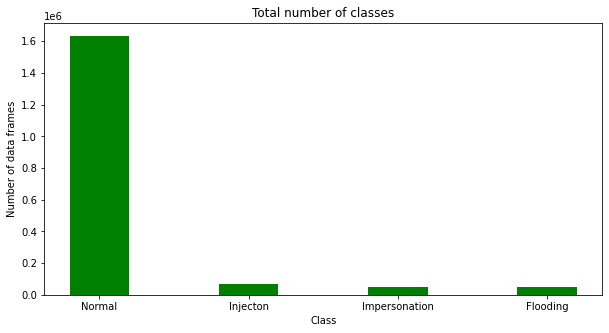

In [12]:
data = { 'Normal':1633190,'Injecton':65379,'Impersonation':48522,'Flooding':48484}
import numpy as np
import matplotlib.pyplot as plt

courses = list(data.keys())
values = list(data.values())  
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("Class")
plt.ylabel("Number of data frames")
plt.title("Total number of classes")
plt.show()

# Different types of attacks

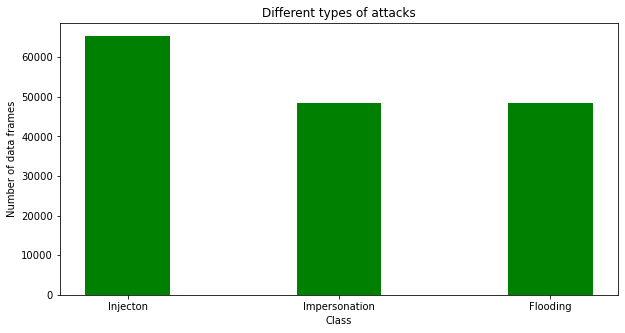

In [13]:
data = { 'Injecton':65379,'Impersonation':48522,'Flooding':48484}
import numpy as np
import matplotlib.pyplot as plt

courses = list(data.keys())
values = list(data.values())  
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("Class")
plt.ylabel("Number of data frames")
plt.title("Different types of attacks")
plt.show()

<h2>Dropping all the null rows</h2>

In [14]:
awid.drop(null_column, axis=1, inplace=True)
awid.dropna(inplace=True)

In [15]:
awid.shape

(885744, 85)

In [16]:
awid.head()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.da,wlan.ta,wlan.sa,wlan.bssid,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.key,data.len,class
17,0,0.0,1.393661e+09,0.002270,0.002270,0.217518,1524,1524,0,0,...,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,96,1,0,1460,normal
18,0,0.0,1.393661e+09,0.000621,0.000621,0.218139,124,124,0,0,...,00:13:33:87:62:6d,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,0,1217,1,0,60,normal
20,0,0.0,1.393661e+09,0.000144,0.000144,0.229118,153,153,0,0,...,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,97,1,0,89,normal
28,0,0.0,1.393661e+09,0.021711,0.021711,0.367359,124,124,0,0,...,00:13:33:87:62:6d,c0:18:85:94:b6:55,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,0,1220,1,0,60,normal
31,0,0.0,1.393661e+09,0.000058,0.000058,0.380933,124,124,0,0,...,c0:18:85:94:b6:55,28:c6:8e:86:d3:d6,00:13:33:87:62:6d,28:c6:8e:86:d3:d6,0,99,1,0,60,normal


*Displaying datatypes of the available features*

In [17]:
print(awid.dtypes)

frame.interface_id              int64
frame.offset_shift            float64
frame.time_epoch              float64
frame.time_delta              float64
frame.time_delta_displayed    float64
                               ...   
wlan.seq                       object
wlan.fcs_good                  object
wlan.wep.key                   object
data.len                       object
class                          object
Length: 85, dtype: object


*Total number of different types of class in the dataset*

In [18]:
awid['class'].value_counts()

normal           775634
injection         65379
impersonation     44731
Name: class, dtype: int64

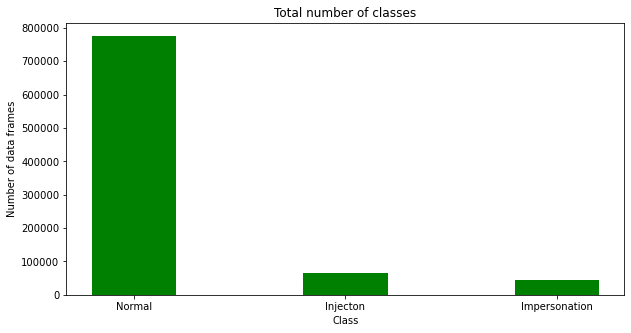

In [19]:
data = { 'Normal':775634,'Injecton':65379,'Impersonation':44731}
import numpy as np
import matplotlib.pyplot as plt

courses = list(data.keys())
values = list(data.values())  
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("Class")
plt.ylabel("Number of data frames")
plt.title("Total number of classes")
plt.show()

# Label Encoding###

*LABEL ENCODER CONVERTING ALL STRING DATA TYPES TO NUMERICAL VALUES*

In [20]:
for col in awid.columns:
    awid[col]=pd.to_numeric(awid[col], errors='ignore')
 

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()

In [22]:
for col in awid.columns:
    if awid[col].dtypes=='object':
        awid[col] = labelencoder.fit_transform(awid[col])

In [23]:
awid.head()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.da,wlan.ta,wlan.sa,wlan.bssid,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.key,data.len,class
17,0,0.0,1.393661e+09,0.002270,0.002270,0.217518,1524,1524,0,0,...,27,8,2,4,0,96,1,0,1460,2
18,0,0.0,1.393661e+09,0.000621,0.000621,0.218139,124,124,0,0,...,0,16,17,4,0,1217,1,0,60,2
20,0,0.0,1.393661e+09,0.000144,0.000144,0.229118,153,153,0,0,...,27,8,2,4,0,97,1,0,89,2
28,0,0.0,1.393661e+09,0.021711,0.021711,0.367359,124,124,0,0,...,0,16,17,4,0,1220,1,0,60,2
31,0,0.0,1.393661e+09,0.000058,0.000058,0.380933,124,124,0,0,...,27,8,2,4,0,99,1,0,60,2


In [24]:
print(awid.dtypes)

frame.interface_id              int64
frame.offset_shift            float64
frame.time_epoch              float64
frame.time_delta              float64
frame.time_delta_displayed    float64
                               ...   
wlan.seq                        int64
wlan.fcs_good                   int64
wlan.wep.key                    int64
data.len                        int64
class                           int32
Length: 85, dtype: object


In [25]:
awid['class'].value_counts()

2    775634
1     65379
0     44731
Name: class, dtype: int64

# Feature Extraction###

*Important Features are extracted from the training dataset using Random Forest Classifier*

In [26]:
X=awid.iloc[:,:-1]
Y=awid.iloc[:,-1]

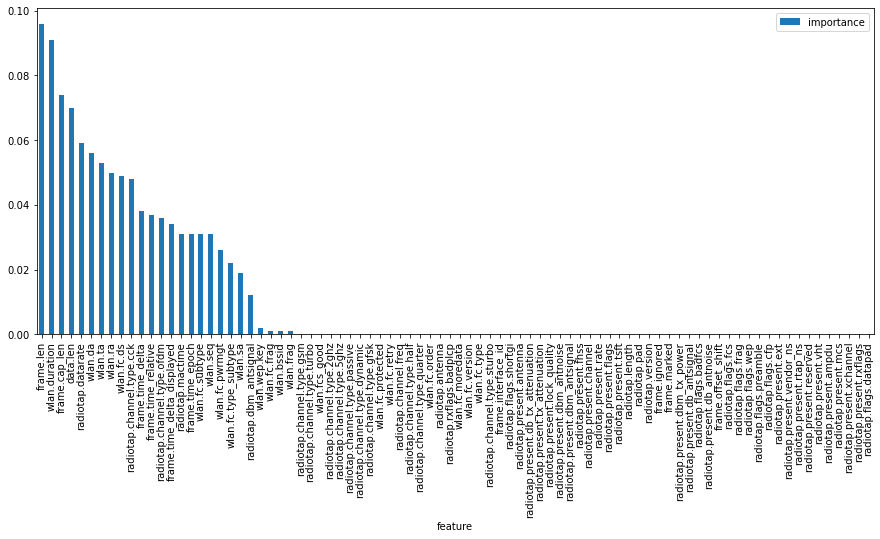

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500);
rfc.fit(X,Y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances= pd.DataFrame({'feature':X.columns,'importance':score})
importances= importances.sort_values('importance',ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (15, 6)
importances.plot.bar();

In [28]:
print(importances.head(25))

                            importance
feature                               
frame.len                        0.096
wlan.duration                    0.091
frame.cap_len                    0.074
data.len                         0.070
radiotap.datarate                0.059
wlan.da                          0.056
wlan.ta                          0.053
wlan.ra                          0.050
wlan.fc.ds                       0.049
radiotap.channel.type.cck        0.048
frame.time_delta                 0.038
frame.time_relative              0.037
radiotap.channel.type.ofdm       0.036
frame.time_delta_displayed       0.034
radiotap.mactime                 0.031
frame.time_epoch                 0.031
wlan.fc.subtype                  0.031
wlan.seq                         0.031
wlan.fc.pwrmgt                   0.026
wlan.fc.type_subtype             0.022
wlan.sa                          0.019
radiotap.dbm_antsignal           0.012
wlan.wep.key                     0.002
wlan.fc.frag             

In [29]:
importances[(importances['importance']==0)]

,importance
feature,
radiotap.channel.type.gsm,0.0
radiotap.channel.type.turbo,0.0
wlan.fcs_good,0.0
radiotap.channel.type.2ghz,0.0
radiotap.channel.type.5ghz,0.0
radiotap.channel.type.passive,0.0
radiotap.channel.type.dynamic,0.0
radiotap.channel.type.gfsk,0.0
wlan.fc.protected,0.0


In [30]:
importances.shape

(84, 1)

In [31]:
importances.drop(['radiotap.channel.type.gfsk','radiotap.channel.freq','radiotap.channel.type.turbo','radiotap.channel.type.2ghz',
                 'radiotap.channel.type.5ghz','radiotap.channel.type.passive','radiotap.channel.type.dynamic','wlan.fc.order',
 'radiotap.channel.type.gsm','radiotap.channel.type.sturbo', 'wlan.fc.moredata','radiotap.channel.type.quarter','radiotap.antenna',
'radiotap.rxflags.badplcp','wlan.fc.version', 'wlan.frag',
 'radiotap.flags.shortgi' ,'wlan.fc.frag', 'radiotap.channel.type.half',
 'radiotap.flags.frag','radiotap.flags.badfcs','radiotap.present.dbm_tx_power','radiotap.present.tx_attenuation','radiotap.present.lock_quality',
 'radiotap.present.dbm_antnoise','radiotap.present.dbm_antsignal','radiotap.present.fhss','radiotap.present.channel',
 'radiotap.present.rate','radiotap.present.flags','radiotap.present.tsft','radiotap.length',
 'radiotap.pad','radiotap.version','frame.ignored','frame.marked',
 'frame.offset_shift','radiotap.present.db_tx_attenuation','radiotap.present.antenna','radiotap.flags.datapad',
 'radiotap.present.db_antsignal','radiotap.flags.fcs','frame.interface_id','radiotap.flags.wep',
 'radiotap.flags.preamble','radiotap.flags.cfp','radiotap.present.ext','radiotap.present.vendor_ns',
 'radiotap.present.rtap_ns','radiotap.present.reserved','radiotap.present.vht','radiotap.present.ampdu',
 'radiotap.present.mcs','radiotap.present.xchannel','radiotap.present.rxflags','radiotap.present.db_antnoise',
 'wlan.fcs_good','wlan.fc.type','wlan.fc.retry','wlan.fc.protected'],axis=0,inplace=True)

In [32]:
importances.shape

(24, 1)

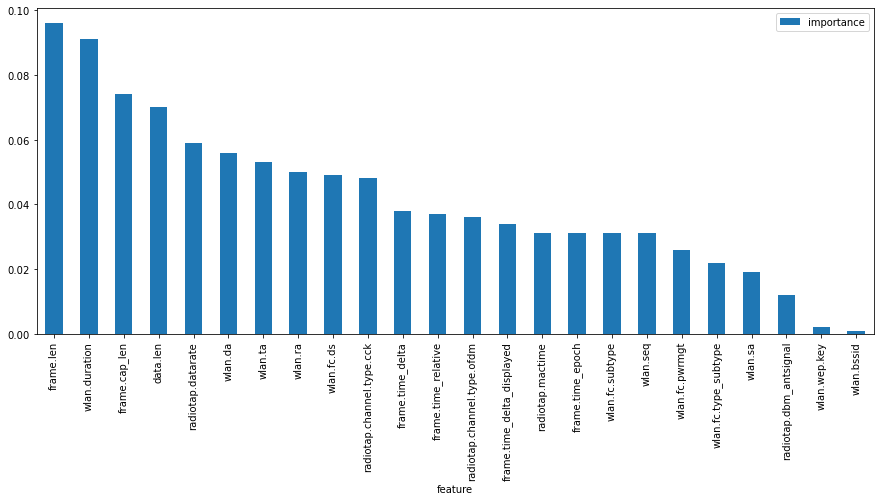

In [33]:
importances.plot.bar();

In [34]:
awid.drop(['radiotap.channel.type.gfsk','radiotap.channel.freq','radiotap.channel.type.turbo','radiotap.channel.type.2ghz',
                 'radiotap.channel.type.5ghz','radiotap.channel.type.passive','radiotap.channel.type.dynamic','wlan.fc.order',
 'radiotap.channel.type.gsm','radiotap.channel.type.sturbo', 'wlan.fc.moredata','radiotap.channel.type.quarter','radiotap.antenna',
'radiotap.rxflags.badplcp','wlan.fc.version', 'wlan.frag',
 'radiotap.flags.shortgi' ,'wlan.fc.frag', 'radiotap.channel.type.half',
 'radiotap.flags.frag','radiotap.flags.badfcs','radiotap.present.dbm_tx_power','radiotap.present.tx_attenuation','radiotap.present.lock_quality',
 'radiotap.present.dbm_antnoise','radiotap.present.dbm_antsignal','radiotap.present.fhss','radiotap.present.channel',
 'radiotap.present.rate','radiotap.present.flags','radiotap.present.tsft','radiotap.length',
 'radiotap.pad','radiotap.version','frame.ignored','frame.marked',
 'frame.offset_shift','radiotap.present.db_tx_attenuation','radiotap.present.antenna','radiotap.flags.datapad',
 'radiotap.present.db_antsignal','radiotap.flags.fcs','frame.interface_id','radiotap.flags.wep',
 'radiotap.flags.preamble','radiotap.flags.cfp','radiotap.present.ext','radiotap.present.vendor_ns',
 'radiotap.present.rtap_ns','radiotap.present.reserved','radiotap.present.vht','radiotap.present.ampdu',
 'radiotap.present.mcs','radiotap.present.xchannel','radiotap.present.rxflags','radiotap.present.db_antnoise',
 'wlan.fcs_good'],axis=1,inplace=True)

In [35]:
awid

,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.mactime,radiotap.datarate,radiotap.channel.type.cck,radiotap.channel.type.ofdm,...,wlan.duration,wlan.ra,wlan.da,wlan.ta,wlan.sa,wlan.bssid,wlan.seq,wlan.wep.key,data.len,class
17,1.393661e+09,0.002270,0.002270,0.217518,1524,1524,2101817362,54.0,0,1,...,44,28,27,8,2,4,96,0,1460,2
18,1.393661e+09,0.000621,0.000621,0.218139,124,124,2101818213,54.0,0,1,...,44,13,0,16,17,4,1217,0,60,2
20,1.393661e+09,0.000144,0.000144,0.229118,153,153,2101829175,54.0,0,1,...,44,28,27,8,2,4,97,0,89,2
28,1.393661e+09,0.021711,0.021711,0.367359,124,124,2101967429,54.0,0,1,...,44,13,0,16,17,4,1220,0,60,2
31,1.393661e+09,0.000058,0.000058,0.380933,124,124,2101981052,54.0,0,1,...,44,28,27,8,2,4,99,0,60,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795504,1.393665e+09,0.015341,0.015341,3599.043342,112,112,5700607575,18.0,0,1,...,48,13,0,11,11,4,2608,0,48,2
1795511,1.393665e+09,0.013841,0.013841,3599.086311,112,112,5700650521,18.0,0,1,...,48,13,0,11,11,4,2609,0,48,2
1795551,1.393665e+09,0.000421,0.000421,3599.323495,1524,1524,5700887520,54.0,0,1,...,44,28,27,8,2,4,0,0,1460,2
1795556,1.393665e+09,0.001861,0.001861,3599.375225,1523,1523,5700939250,54.0,0,1,...,44,28,27,8,2,4,1,0,1459,2


In [36]:
from sklearn.model_selection import train_test_split
X_train, a, Y_train, b = train_test_split(X, Y, test_size=0.3, random_state=1) 

In [61]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train,Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train,Y_train)

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train,Y_train);


# DECISION TREE

In [38]:
a=DTC_Classifier.predict(X_train)

In [39]:
import sklearn.metrics as metrics
accuracy_D= metrics.accuracy_score(Y_train, DTC_Classifier.predict(X_train))
confusion_matrix_D= metrics.confusion_matrix(Y_train, DTC_Classifier.predict(X_train))

In [40]:
print('Accuracy:',accuracy_D)
print('confustion_matrix')
print(confusion_matrix_D)

Accuracy: 1.0
confustion_matrix
[[ 31324      0      0]
 [     0  45657      0]
 [     0      0 543039]]


# Naive Bayes 

In [41]:
b=BNB_Classifier.predict(X_train)
import sklearn.metrics as metrics
accuracy_N= metrics.accuracy_score(Y_train,BNB_Classifier.predict(X_train))
confusion_matrix_N= metrics.confusion_matrix(Y_train, BNB_Classifier.predict(X_train))
print('Accuracy:',accuracy_N)
print('confustion_matrix')
print(confusion_matrix_N)

Accuracy: 0.9597916196251733
confustion_matrix
[[ 31322      1      1]
 [     0  45657      0]
 [ 24815    113 518111]]


# Logistic Regression

In [42]:
l=LGR_Classifier.predict(X_train)
import sklearn.metrics as metrics
accuracy_l= metrics.accuracy_score(Y_train,LGR_Classifier.predict(X_train))
confusion_matrix_l= metrics.confusion_matrix(Y_train,LGR_Classifier.predict(X_train))
print('Accuracy:',accuracy_l)
print('confustion_matrix')
print(confusion_matrix_l)

Accuracy: 0.8758411018999387
confustion_matrix
[[     0      0  31324]
 [     0      0  45657]
 [     0      0 543039]]


# 10 iterations

In [62]:
from sklearn import metrics
mo = ['NB','DT','LGR']
j = 0
models = []
acc_10={}
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores= cross_val_score(v, X_train, Y_train, cv=10)
    accuracy= metrics.accuracy_score(Y_train, v.predict(X_train))
    acc_10[mo[j]]=scores
    j = j+1
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification)
    



============================== Naive Baye Classifier Model Evaluation ==============================

Accuracy:
 0.9597916196251733

Confusion matrix:
 [[ 31322      1      1]
 [     0  45657      0]
 [ 24815    113 518111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72     31324
           1       1.00      1.00      1.00     45657
           2       1.00      0.95      0.98    543039

    accuracy                           0.96    620020
   macro avg       0.85      0.98      0.90    620020
weighted avg       0.98      0.96      0.96    620020


============================== Decision Tree Classifier Model Evaluation ==============================

Accuracy:
 1.0

Confusion matrix:
 [[ 31324      0      0]
 [     0  45657      0]
 [     0      0 543039]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31324
           1       1

In [63]:
acc_10
acc.update({'Iterations':[1,2,3,4,5,6,7,8,9,10]})

{'NB': array([0.96095287, 0.96046902, 0.96125931, 0.96011419, 0.95914648,
        0.95979162, 0.95934002, 0.95696913, 0.96103352, 0.95869488]),
 'DT': array([1.        , 0.99998387, 1.        , 0.99998387, 1.        ,
        1.        , 0.99998387, 1.        , 1.        , 1.        ]),
 'LGR': array([0.87584271, 0.87584271, 0.87584271, 0.87584271, 0.87584271,
        0.87584271, 0.87584271, 0.87584271, 0.87584271, 0.87582659])}

In [64]:
import numpy as np
import pandas as pd
A=pd.DataFrame(acc_10)
A

,NB,DT,LGR
0,0.960953,1.000000,0.875843
1,0.960469,0.999984,0.875843
2,0.961259,1.000000,0.875843
3,0.960114,0.999984,0.875843
4,0.959146,1.000000,0.875843
5,0.959792,1.000000,0.875843
6,0.959340,0.999984,0.875843
7,0.956969,1.000000,0.875843
8,0.961034,1.000000,0.875843
9,0.958695,1.000000,0.875827


In [65]:
A.mean()

NB     0.959777
DT     0.999995
LGR    0.875841
dtype: float64

Text(0, 0.5, 'Accuracy value')

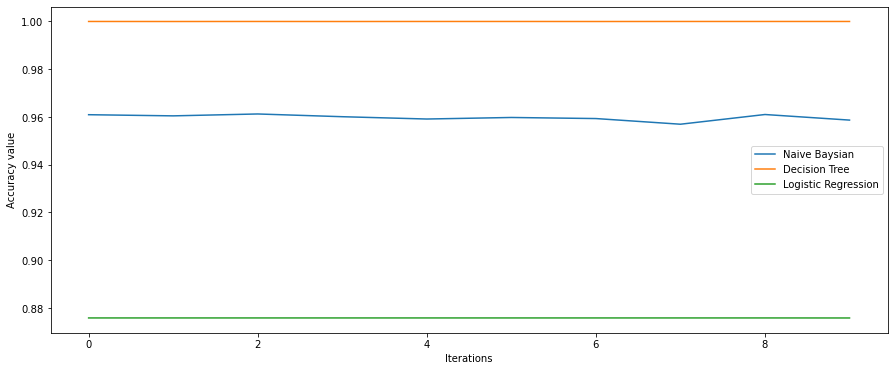

In [67]:
plt.plot(acc_10['NB'],label="Naive Baysian")
plt.plot(acc_10['DT'],label="Decision Tree")
plt.plot(acc_10['LGR'],label="Logistic Regression")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Accuracy value")

# 20 iterations

In [68]:
from sklearn import metrics
mo = ['NB','DT','LGR']
j = 0
models = []
acc_20={}
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores= cross_val_score(v, X_train, Y_train, cv=20)
    accuracy= metrics.accuracy_score(Y_train, v.predict(X_train))
    acc_20[mo[j]]=scores
    j = j+1
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification)
    



============================== Naive Baye Classifier Model Evaluation ==============================

Accuracy:
 0.9597916196251733

Confusion matrix:
 [[ 31322      1      1]
 [     0  45657      0]
 [ 24815    113 518111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72     31324
           1       1.00      1.00      1.00     45657
           2       1.00      0.95      0.98    543039

    accuracy                           0.96    620020
   macro avg       0.85      0.98      0.90    620020
weighted avg       0.98      0.96      0.96    620020


============================== Decision Tree Classifier Model Evaluation ==============================

Accuracy:
 1.0

Confusion matrix:
 [[ 31324      0      0]
 [     0  45657      0]
 [     0      0 543039]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31324
           1       1

In [69]:
acc_20

{'NB': array([0.9614206 , 0.96048515, 0.95903358, 0.96190445, 0.96067869,
        0.96183994, 0.96009806, 0.96013032, 0.95745299, 0.96083997,
        0.96045289, 0.95913035, 0.95925938, 0.95942066, 0.95667882,
        0.95725944, 0.96229154, 0.95977549, 0.95877552, 0.95861424]),
 'DT': array([1.        , 1.        , 1.        , 0.99996774, 1.        ,
        1.        , 1.        , 0.99996774, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99996774, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ]),
 'LGR': array([0.87584271, 0.87584271, 0.87584271, 0.87584271, 0.87584271,
        0.87584271, 0.87584271, 0.87584271, 0.87584271, 0.87584271,
        0.87584271, 0.87584271, 0.87584271, 0.87584271, 0.87584271,
        0.87584271, 0.87584271, 0.87584271, 0.87584271, 0.87581046])}

In [70]:
import numpy as np
import pandas as pd
B=pd.DataFrame(acc_20)
B

,NB,DT,LGR
0,0.961421,1.000000,0.875843
1,0.960485,1.000000,0.875843
2,0.959034,1.000000,0.875843
3,0.961904,0.999968,0.875843
4,0.960679,1.000000,0.875843
5,0.961840,1.000000,0.875843
6,0.960098,1.000000,0.875843
7,0.960130,0.999968,0.875843
8,0.957453,1.000000,0.875843
9,0.960840,1.000000,0.875843


In [71]:
print(B.mean())

NB     0.959777
DT     0.999995
LGR    0.875841
dtype: float64


Text(0, 0.5, 'Accuracy value')

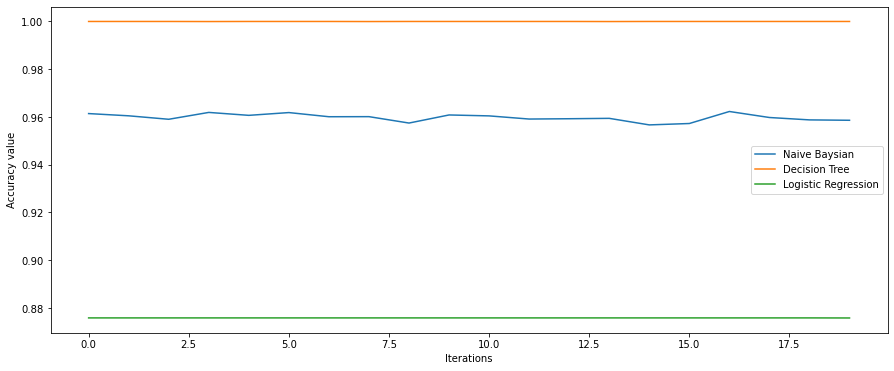

In [74]:
plt.plot(acc_20['NB'],label="Naive Baysian")
plt.plot(acc_20['DT'],label="Decision Tree")
plt.plot(acc_20['LGR'],label="Logistic Regression")

plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Accuracy value")

# 30 iterations

In [107]:
from sklearn import metrics
mo = ['NB','DT','LGR']
j = 0
models = []
acc_30={}
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores= cross_val_score(v, X_train, Y_train, cv=30)
    accuracy= metrics.accuracy_score(Y_train, v.predict(X_train))
    acc_30[mo[j]]=scores
    j = j+1
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification)
    



============================== Naive Baye Classifier Model Evaluation ==============================

Accuracy:
 0.9597916196251733

Confusion matrix:
 [[ 31322      1      1]
 [     0  45657      0]
 [ 24815    113 518111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72     31324
           1       1.00      1.00      1.00     45657
           2       1.00      0.95      0.98    543039

    accuracy                           0.96    620020
   macro avg       0.85      0.98      0.90    620020
weighted avg       0.98      0.96      0.96    620020


============================== Decision Tree Classifier Model Evaluation ==============================

Accuracy:
 1.0

Confusion matrix:
 [[ 31324      0      0]
 [     0  45657      0]
 [     0      0 543039]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31324
           1       1

In [ ]:
acc_30

In [ ]:
import numpy as np
import pandas as pd
C=pd.DataFrame(acc_30)
C

In [82]:
print(C.mean())

NB     0.959777
DT     0.999995
LGR    0.875841
dtype: float64


Text(0, 0.5, 'Accuracy value')

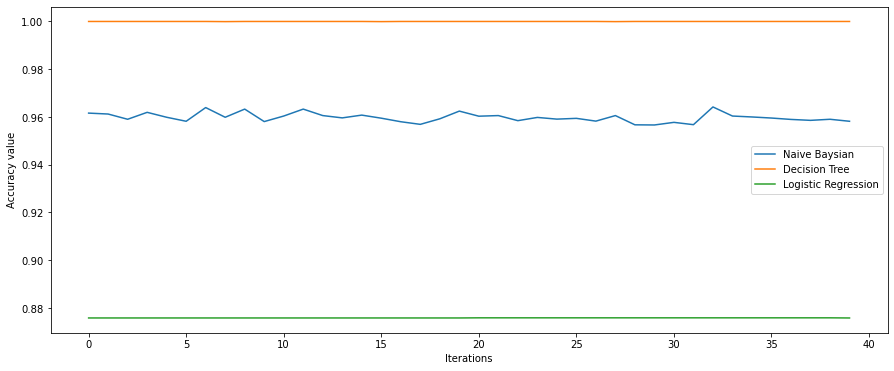

In [83]:
plt.plot(acc_30['NB'],label="Naive Baysian")
plt.plot(acc_30['DT'],label="Decision Tree")
plt.plot(acc_30['LGR'],label="Logistic Regression")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Accuracy value")

# 40 iteration

In [84]:
from sklearn import metrics
mo = ['NB','DT','LGR']
j = 0
models = []
acc_40={}
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores= cross_val_score(v, X_train, Y_train, cv=40)
    accuracy= metrics.accuracy_score(Y_train, v.predict(X_train))
    acc_40[mo[j]]=scores
    j = j+1
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification)
    



============================== Naive Baye Classifier Model Evaluation ==============================

Accuracy:
 0.9597916196251733

Confusion matrix:
 [[ 31322      1      1]
 [     0  45657      0]
 [ 24815    113 518111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72     31324
           1       1.00      1.00      1.00     45657
           2       1.00      0.95      0.98    543039

    accuracy                           0.96    620020
   macro avg       0.85      0.98      0.90    620020
weighted avg       0.98      0.96      0.96    620020


============================== Decision Tree Classifier Model Evaluation ==============================

Accuracy:
 1.0

Confusion matrix:
 [[ 31324      0      0]
 [     0  45657      0]
 [     0      0 543039]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31324
           1       1

In [85]:
acc_40

{'NB': array([0.96161538, 0.96122831, 0.9590349 , 0.96193794, 0.95987356,
        0.95819625, 0.96393781, 0.95987356, 0.96329269, 0.95806722,
        0.96038965, 0.96329269, 0.96058319, 0.95961551, 0.96077672,
        0.95948648, 0.95800271, 0.95690601, 0.95922844, 0.96245404,
        0.96032258, 0.96058065, 0.95845161, 0.95980645, 0.95909677,
        0.95941935, 0.95825806, 0.96058065, 0.95670968, 0.95664516,
        0.95774194, 0.95677419, 0.96419355, 0.9603871 , 0.96      ,
        0.95954839, 0.95896774, 0.95858065, 0.95903226, 0.95819355]),
 'DT': array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.99993549, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.99993549, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.99993548, 1.        , 1.        ,
        1.        , 1.        , 1.

In [86]:
import numpy as np
import pandas as pd
D=pd.DataFrame(acc_40)
D

,NB,DT,LGR
0,0.961615,1.000000,0.875814
1,0.961228,1.000000,0.875814
2,0.959035,1.000000,0.875814
3,0.961938,1.000000,0.875814
4,0.959874,1.000000,0.875814
5,0.958196,1.000000,0.875814
6,0.963938,1.000000,0.875814
7,0.959874,0.999935,0.875814
8,0.963293,1.000000,0.875814
9,0.958067,1.000000,0.875814


In [106]:
D.mean()

NB     0.959777
DT     0.999995
LGR    0.875841
dtype: float64

Text(0, 0.5, 'Accuracy value')

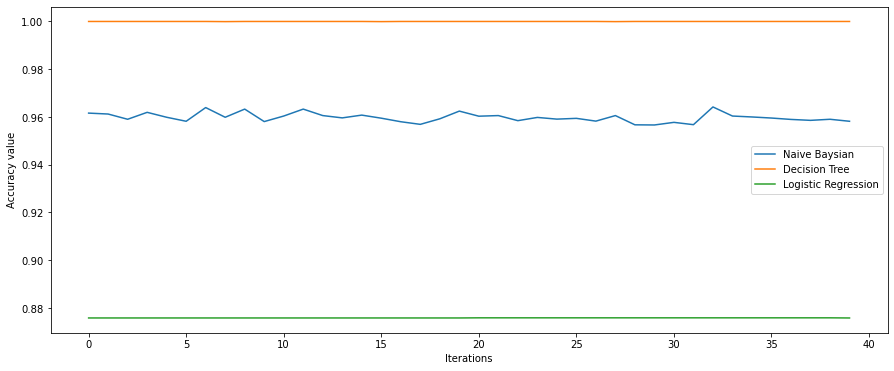

In [87]:
plt.plot(acc_40['NB'],label="Naive Baysian")
plt.plot(acc_40['DT'],label="Decision Tree")
plt.plot(acc_40['LGR'],label="Logistic Regression")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Accuracy value")

# 50 iterations

In [53]:
from sklearn import metrics
mo = ['NB','DT','LGR']
j = 0
models = []
acc={}
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores= cross_val_score(v, X_train, Y_train, cv=50)
    accuracy= metrics.accuracy_score(Y_train, v.predict(X_train))
    acc_50[mo[j]]=scores
    j = j+1
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification)
    



============================== Naive Baye Classifier Model Evaluation ==============================

Accuracy:
 0.9597916196251733

Confusion matrix:
 [[ 31322      1      1]
 [     0  45657      0]
 [ 24815    113 518111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.72     31324
           1       1.00      1.00      1.00     45657
           2       1.00      0.95      0.98    543039

    accuracy                           0.96    620020
   macro avg       0.85      0.98      0.90    620020
weighted avg       0.98      0.96      0.96    620020


============================== Decision Tree Classifier Model Evaluation ==============================

Accuracy:
 1.0

Confusion matrix:
 [[ 31324      0      0]
 [     0  45657      0]
 [     0      0 543039]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31324
           1       1

In [92]:
acc
acc.update({'Iterations':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]})

In [94]:
import numpy as np
import pandas as pd
E=pd.DataFrame(acc)
E


,NB,DT,LGR,Iterations
0,0.962342,1.000000,0.875816,1
1,0.960326,1.000000,0.875816,2
2,0.959197,1.000000,0.875816,3
3,0.960406,1.000000,0.875816,4
4,0.962503,1.000000,0.875816,5
5,0.959761,1.000000,0.875816,6
6,0.958955,1.000000,0.875816,7
7,0.961858,1.000000,0.875816,8
8,0.962180,1.000000,0.875816,9
9,0.959600,0.999919,0.875816,10


In [104]:
E.mean()

NB             0.959777
DT             0.999995
LGR            0.875841
Iterations    25.500000
dtype: float64

# Accuracy

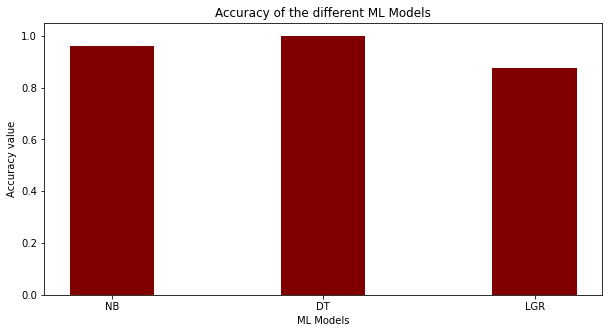

In [101]:
data = {'NB':accuracy_N,'DT':accuracy_D,'LGR':accuracy_l}
import numpy as np
import matplotlib.pyplot as plt
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("ML Models")
plt.ylabel("Accuracy value")
plt.title("Accuracy of the different ML Models")
plt.show()